In [1]:
import numpy as np
import zarr
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [13]:
data = zarr.load("./mimicry_2024-06-18_11-26-00.zarr/")

In [14]:
s = data['s']
v = data['v']
d = data['d']
r = data['r']

In [15]:
s_weighted = []
d_mean = []
s_mimic = []
for t in range(len(s)):
    s_t = s[t]
    d_t = d[t]
    v_t = v[t]
    s_weighted += [(s_t[:200].T * v_t).sum(1) / v_t.sum()]
    d_mean += [d_t.mean(0)]
s_weighted = np.array(s_weighted)
d_mean = np.array(d_mean)

(0.0, 1000.0)

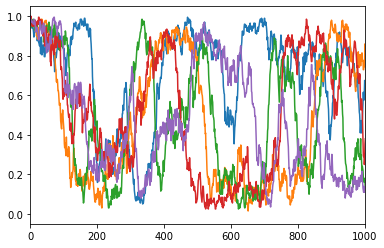

In [17]:
plt.plot(range(len(s_weighted)), s_weighted)
plt.xlim(0, 1000)

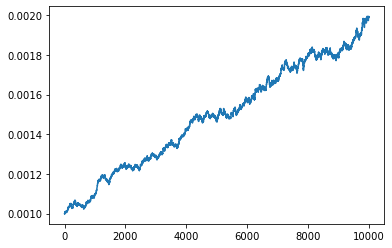

In [18]:
plt.plot(range(1, 10001), v.mean(1))
# plt.xscale('log')

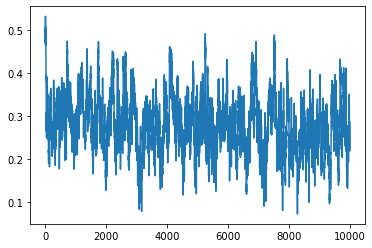

In [6]:
plt.plot(range(1, 10000), abs(s[1:] - s[:-1]).mean((2,1)))